# Laboratory 02

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from numpy import mean
from numpy import std
%matplotlib inline
df = pd.read_csv (r'data/us_contagious_diseases.csv')
sns.set()

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Task #1

In [3]:
print(df.head())
df.shape

   Unnamed: 0      disease    state  year  weeks_reporting  count  population
0           1  Hepatitis A  Alabama  1966               50    321   3345787.0
1           2  Hepatitis A  Alabama  1967               49    291   3364130.0
2           3  Hepatitis A  Alabama  1968               52    314   3386068.0
3           4  Hepatitis A  Alabama  1969               49    380   3412450.0
4           5  Hepatitis A  Alabama  1970               51    413   3444165.0


(16065, 7)

In [4]:
map = (df['disease'] == 'Measles')
df_measles=df[map]
df_measles.shape

(3825, 7)

In [5]:
map_states = (df_measles['state'] != 'Hawaii')
map_states = (df_measles['state'] != 'Alaska')

In [6]:
df_measles = df_measles[map_states]
df_measles.shape

(3750, 7)

In [7]:
df_measles

,Unnamed: 0,disease,state,year,weeks_reporting,count,population
2346,2347,Measles,Alabama,1928,52,8843,2589923.0
2347,2348,Measles,Alabama,1929,49,2959,2619131.0
2348,2349,Measles,Alabama,1930,52,4156,2646248.0
2349,2350,Measles,Alabama,1931,49,8934,2670818.0
2350,2351,Measles,Alabama,1932,41,270,2693027.0
...,...,...,...,...,...,...,...
6166,6167,Measles,Wyoming,1998,0,0,479897.0
6167,6168,Measles,Wyoming,1999,0,0,486758.0
6168,6169,Measles,Wyoming,2000,0,0,493782.0
6169,6170,Measles,Wyoming,2001,0,0,500794.0


In [8]:
#Now we make the rate per 100,000 people in a new column called '100,000_rate'
df_measles['100,000_rate'] = (df_measles['count'] * 100_000) / df_measles['population']
df_measles


,Unnamed: 0,disease,state,year,weeks_reporting,count,population,"100,000_rate"
2346,2347,Measles,Alabama,1928,52,8843,2589923.0,341.438722
2347,2348,Measles,Alabama,1929,49,2959,2619131.0,112.976403
2348,2349,Measles,Alabama,1930,52,4156,2646248.0,157.052551
2349,2350,Measles,Alabama,1931,49,8934,2670818.0,334.504260
2350,2351,Measles,Alabama,1932,41,270,2693027.0,10.025893
...,...,...,...,...,...,...,...,...
6166,6167,Measles,Wyoming,1998,0,0,479897.0,0.000000
6167,6168,Measles,Wyoming,1999,0,0,486758.0,0.000000
6168,6169,Measles,Wyoming,2000,0,0,493782.0,0.000000
6169,6170,Measles,Wyoming,2001,0,0,500794.0,0.000000


In [9]:
#We also have to take into consideration number of weeks that were reported troughout the year
#So we make it proportional
df_measles['week_proportion'] = (df_measles['weeks_reporting'] / 52)
df_measles['100,000_rate'] = df_measles['100,000_rate'] / df_measles['week_proportion']
df_measles

,Unnamed: 0,disease,state,year,weeks_reporting,count,population,"100,000_rate",week_proportion
2346,2347,Measles,Alabama,1928,52,8843,2589923.0,341.438722,1.000000
2347,2348,Measles,Alabama,1929,49,2959,2619131.0,119.893326,0.942308
2348,2349,Measles,Alabama,1930,52,4156,2646248.0,157.052551,1.000000
2349,2350,Measles,Alabama,1931,49,8934,2670818.0,354.984113,0.942308
2350,2351,Measles,Alabama,1932,41,270,2693027.0,12.715766,0.788462
...,...,...,...,...,...,...,...,...,...
6166,6167,Measles,Wyoming,1998,0,0,479897.0,NaN,0.000000
6167,6168,Measles,Wyoming,1999,0,0,486758.0,NaN,0.000000
6168,6169,Measles,Wyoming,2000,0,0,493782.0,NaN,0.000000
6169,6170,Measles,Wyoming,2001,0,0,500794.0,NaN,0.000000


# Task #2

In [10]:
#We create another filter only for the state of California
map_california = (df_measles['state'] == 'California')
df_measles_california = df_measles[map_california]
print(type(plt))

<class 'module'>


[]

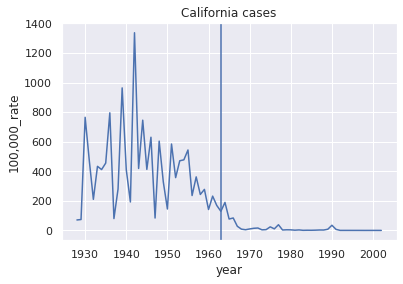

In [11]:
ax=sns.lineplot('year',
                 '100,000_rate',
                 data=df_measles_california)
ax.axvline(x=1963)
ax.set_title('California cases')
plt.plot()

# Task #3

In [12]:
map_1950 = (df_measles['year'] == 1950)
df_measles_1950 = df_measles[map_1950]

map_1960 = (df_measles['year'] == 1960)
df_measles_1960 = df_measles[map_1960]

map_1970 = (df_measles['year'] == 1970)
df_measles_1970 = df_measles[map_1970]

[]

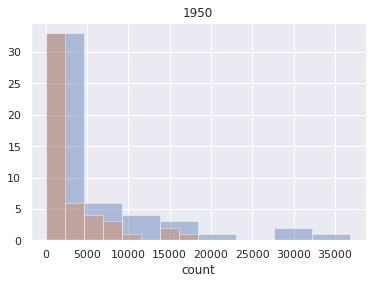

In [13]:
bins=8
ax=sns.distplot(df_measles_1950['count'],  kde=False, label='Normal',bins=bins)
ax=sns.distplot(df_measles_1950['count']**1/2,  kde=False,label='Square root transformation',bins=bins)

# Plot formatting
ax.set_title('1950')
plt.plot()

[]

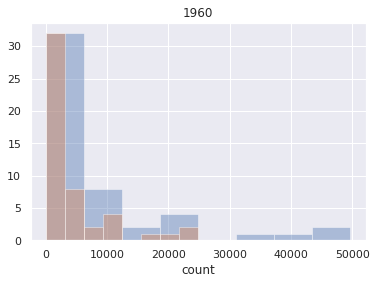

In [14]:
ax=sns.distplot(df_measles_1960['count'],  kde=False, label='Normal',bins=bins)

ax=sns.distplot(df_measles_1960['count']**1/2,  kde=False,label='Square root transformation', bins=bins)

# Plot formatting
ax.set_title('1960')
plt.plot()

[]

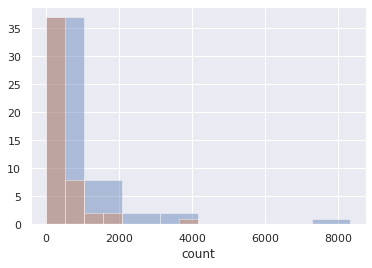

In [15]:
ax=sns.distplot(df_measles_1970['count'],  kde=False, label='Normal',bins=bins)
ax=sns.distplot(df_measles_1970['count']**1/2, kde=False,label='Square root transformation', bins=bins)

# Plot formatting
ax.set_title=('1970')
plt.plot()

# Task #4

[]

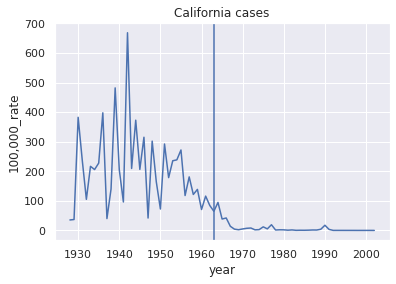

In [16]:
ax=sns.lineplot('year',
                 df_measles_california['100,000_rate']**1/2,
                 data=df_measles_california)
ax.axvline(x=1963)
ax.set_title('California cases')
plt.plot()

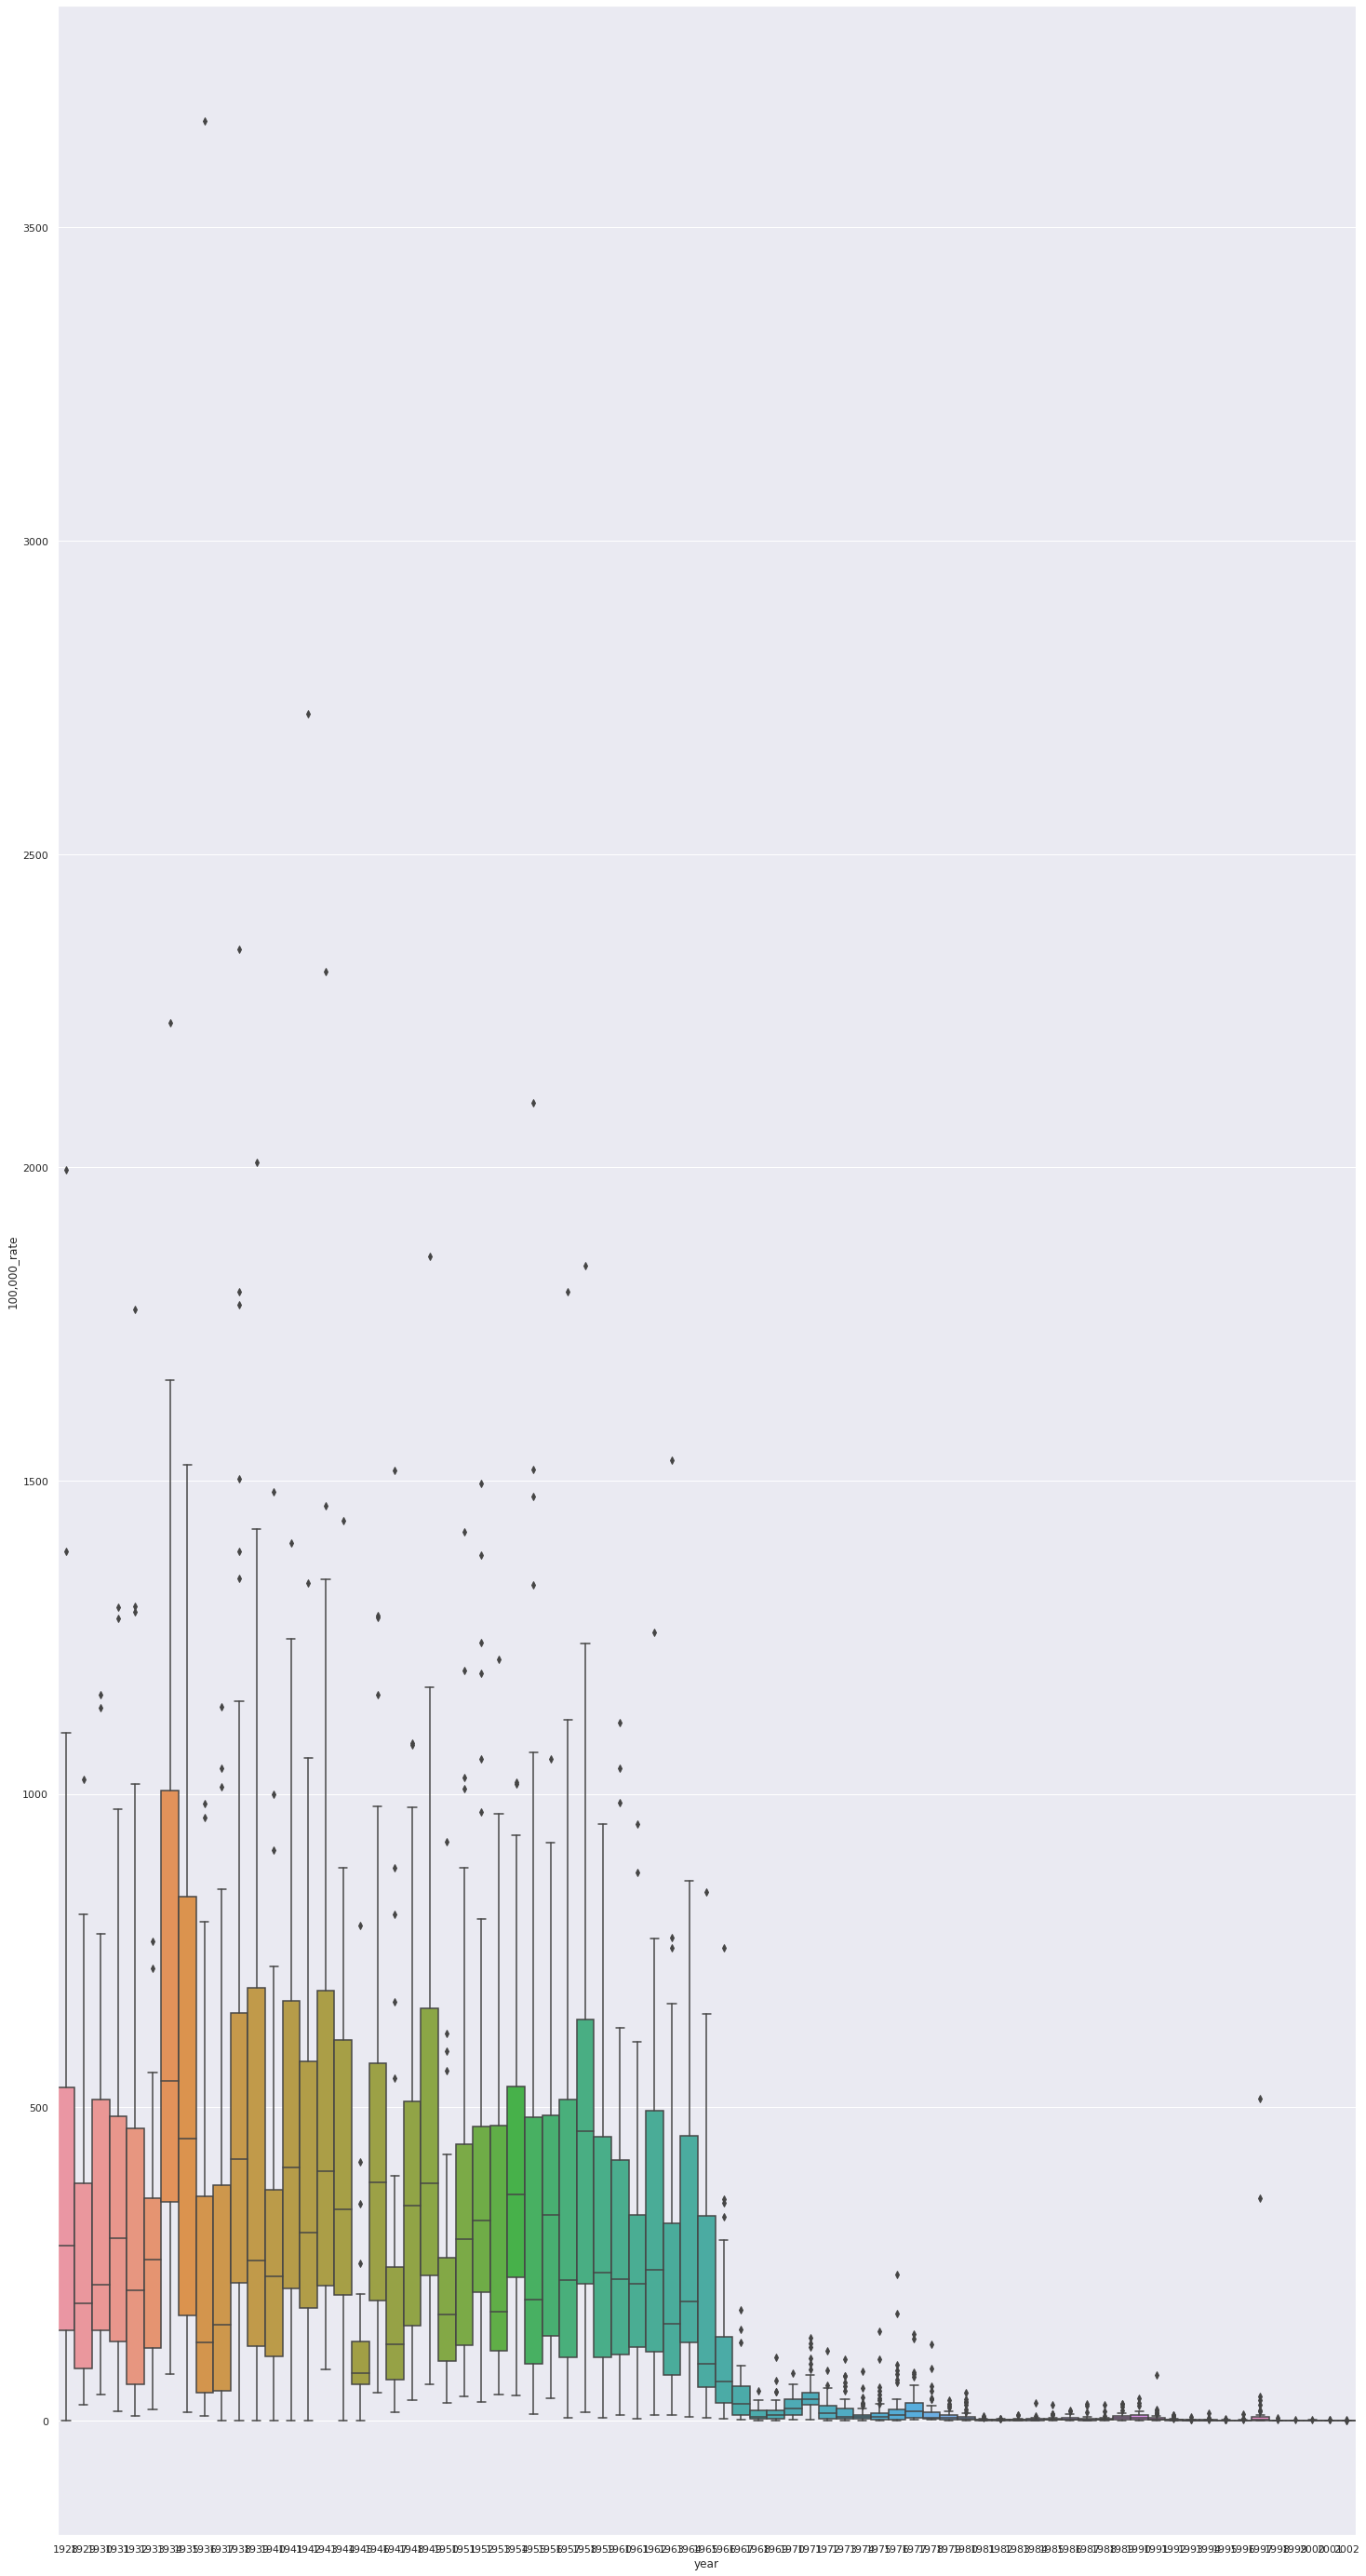

In [17]:
sns.boxplot(x=df_measles['year'],y=df_measles['100,000_rate'],width=1)
fig = plt.gcf()
fig.set_size_inches(25, 50)

plt.show()

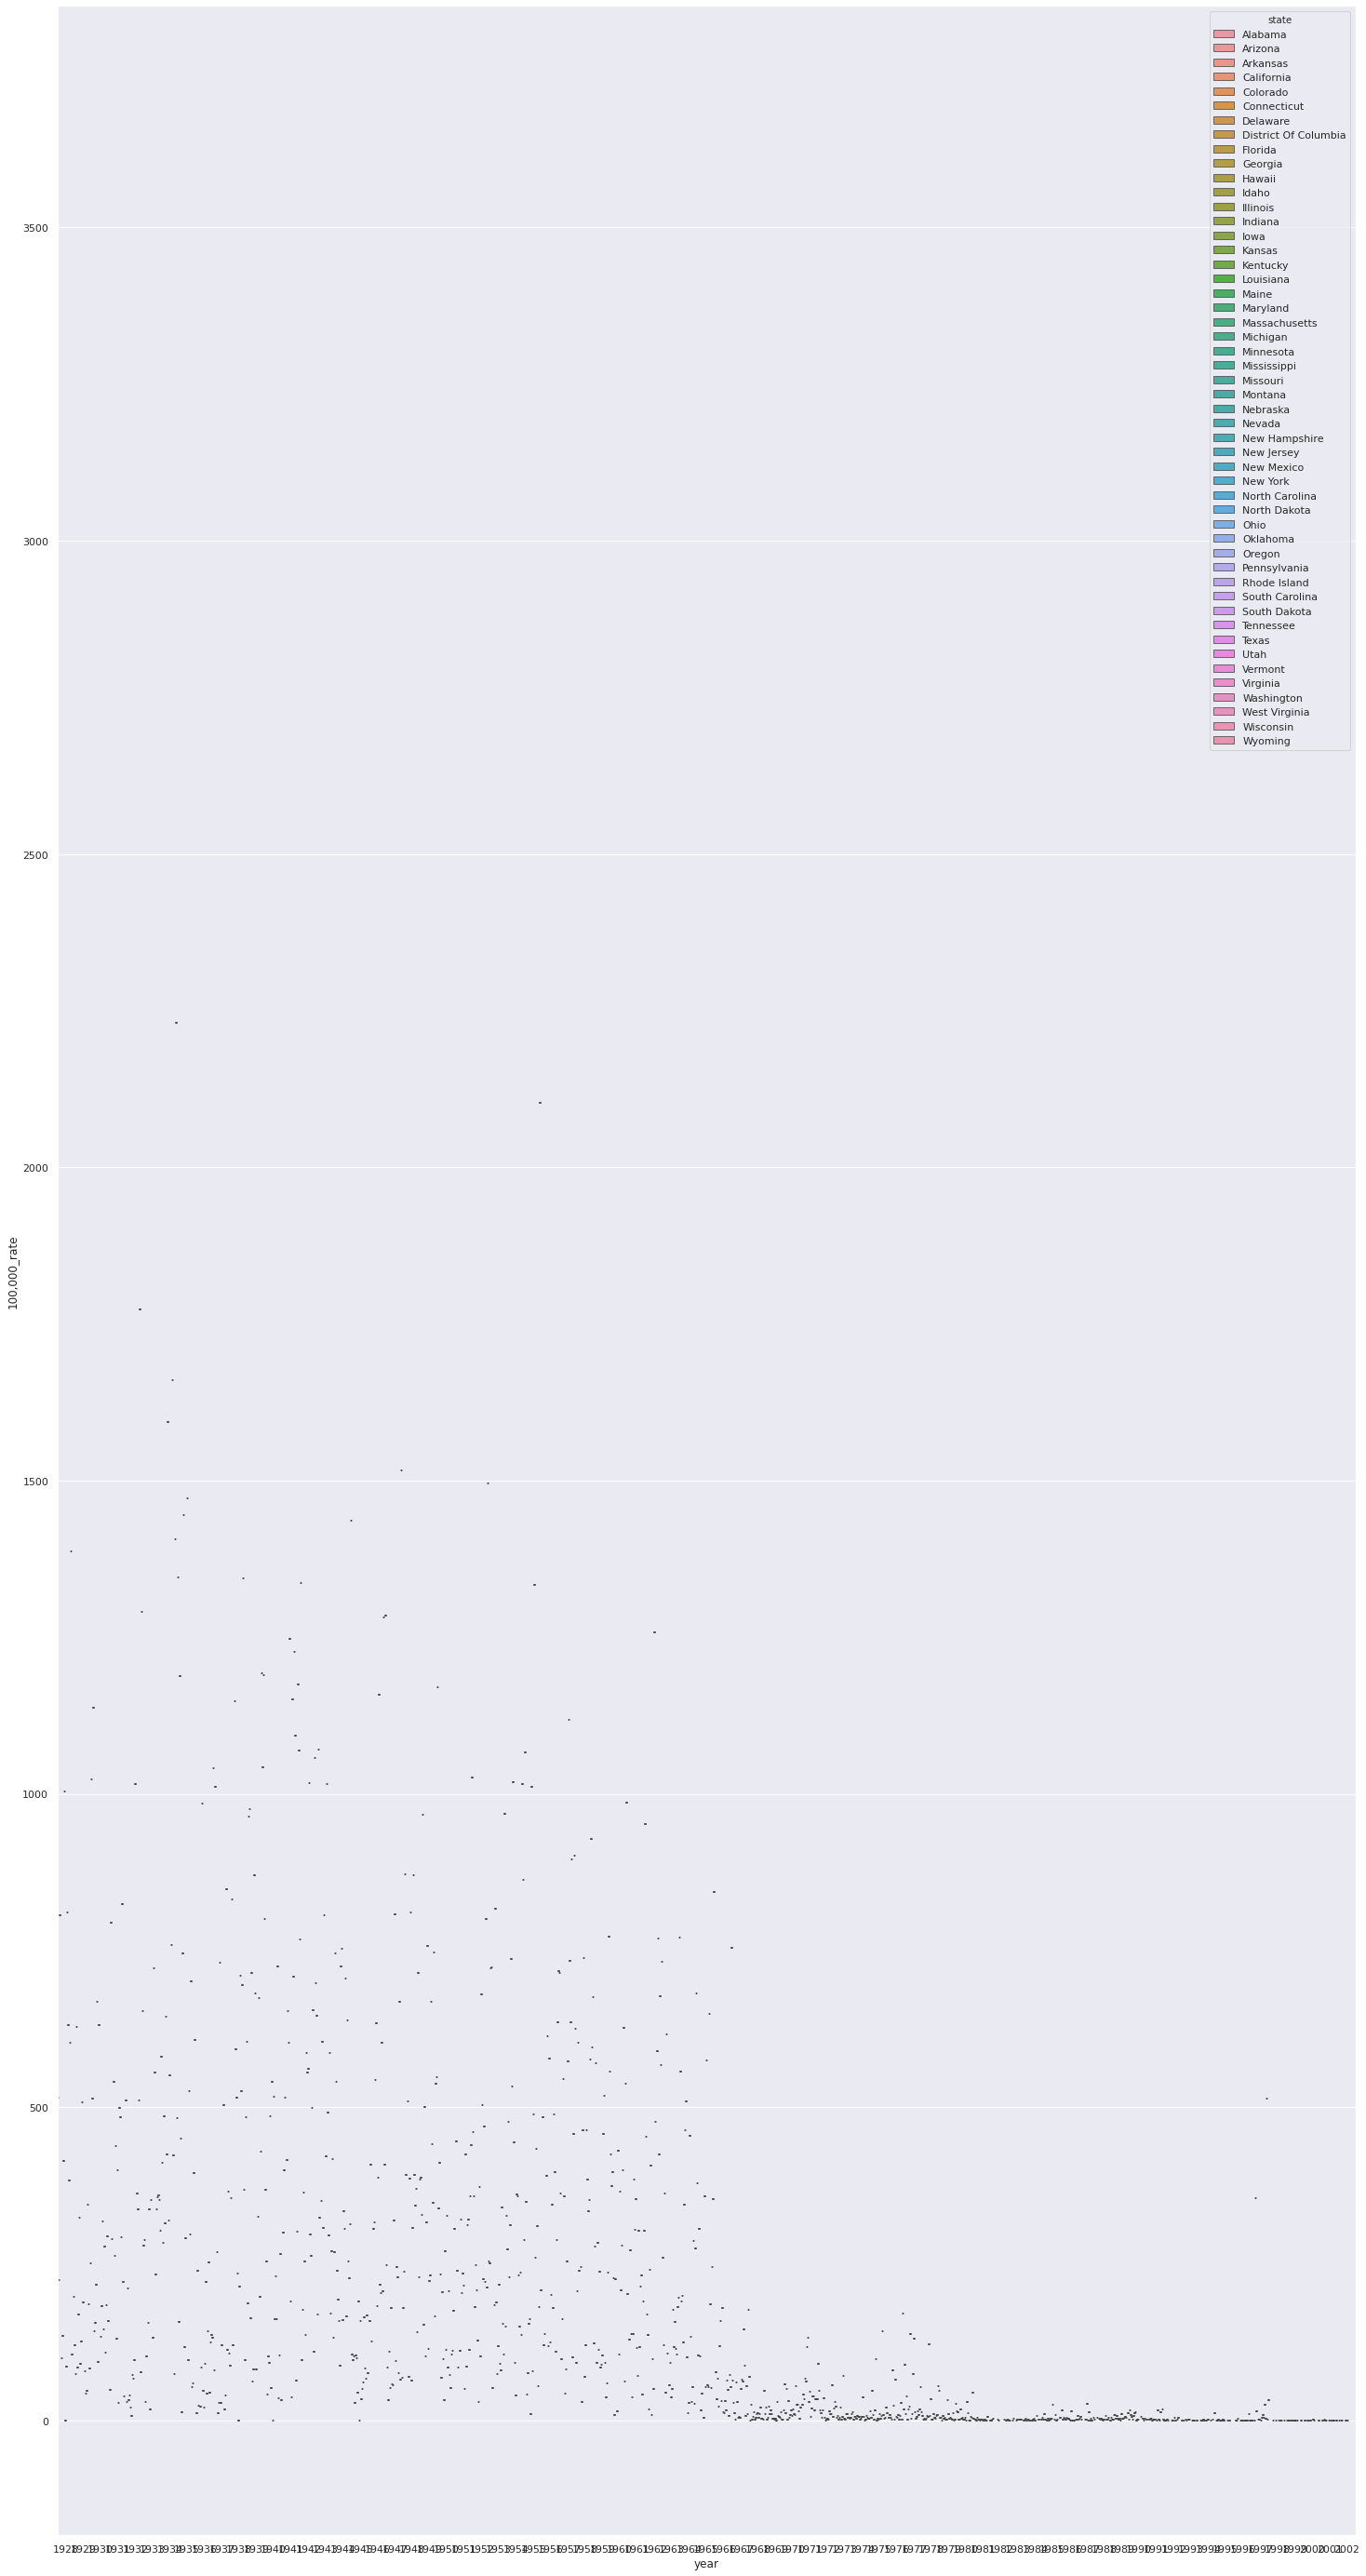

In [18]:
sns.boxplot(x=df_measles['year'],y=df_measles['100,000_rate'],hue=df_measles['state'],width=1)
fig = plt.gcf()
fig.set_size_inches(25, 50)

plt.show()

[]

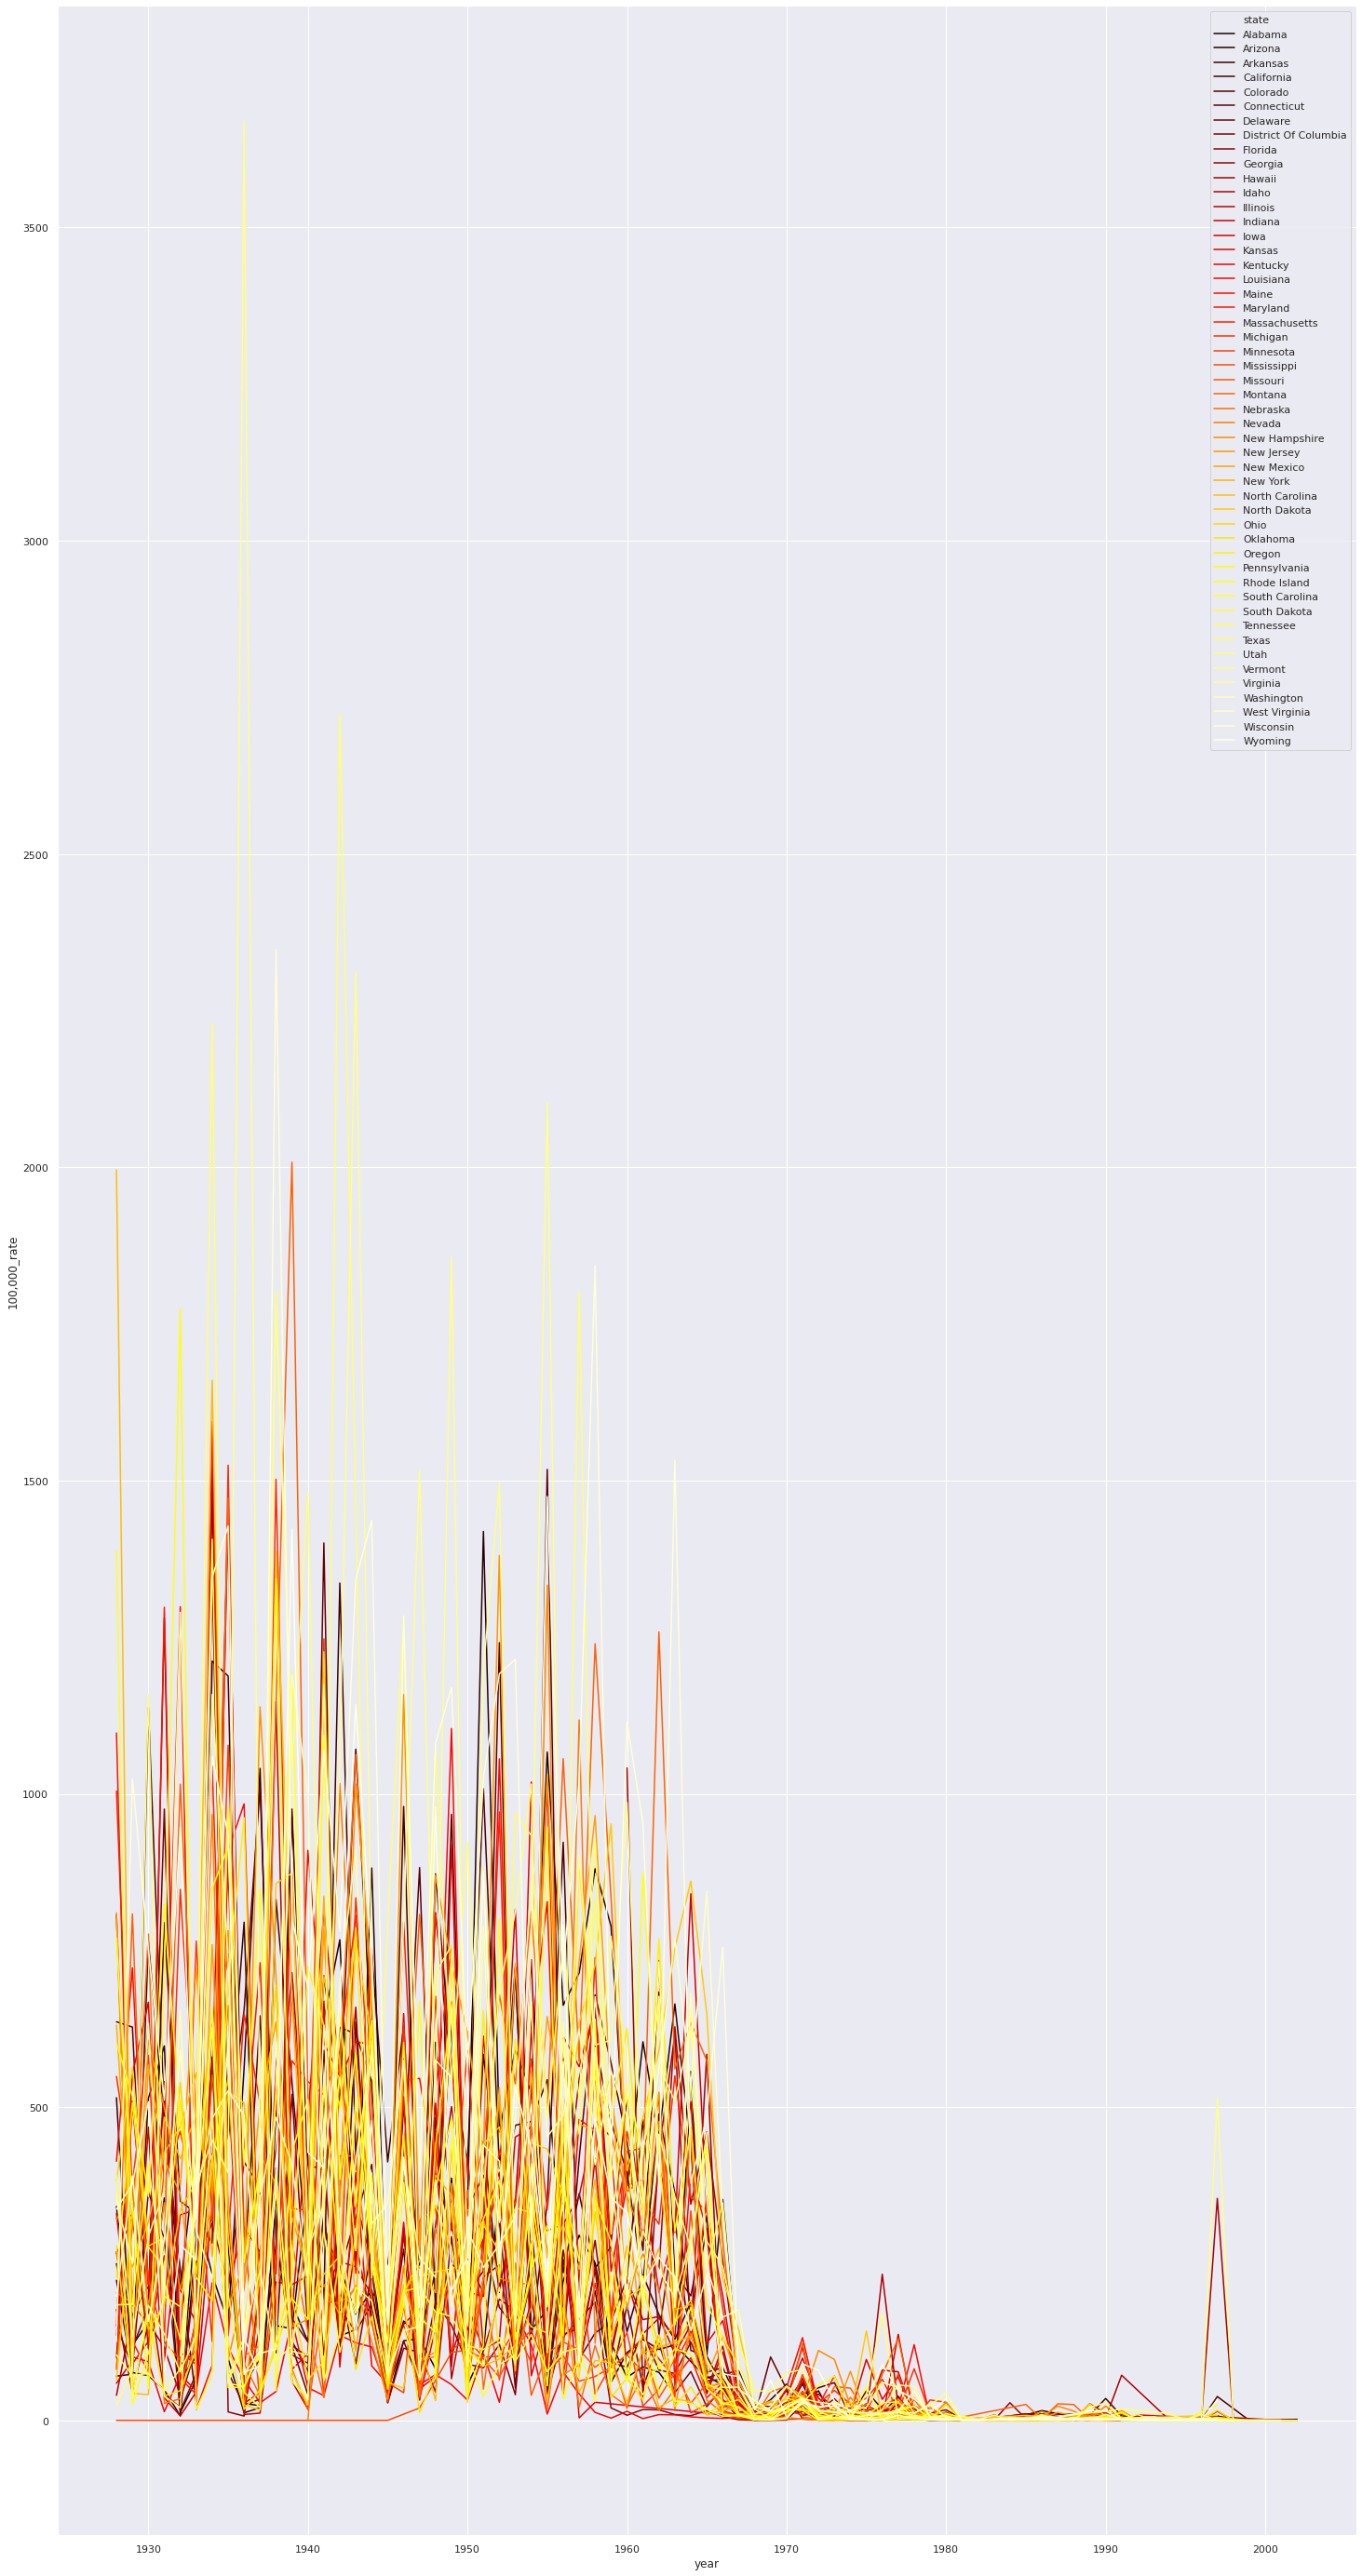

In [19]:
sns.lineplot(x = "year", y = "100,000_rate", data = df_measles, hue = "state",
            palette = "hot", dashes = False, 
            markers = ["o", "<", ">", "^"],  legend="brief",)
fig = plt.gcf()
fig.set_size_inches(25, 50)
plt.plot()

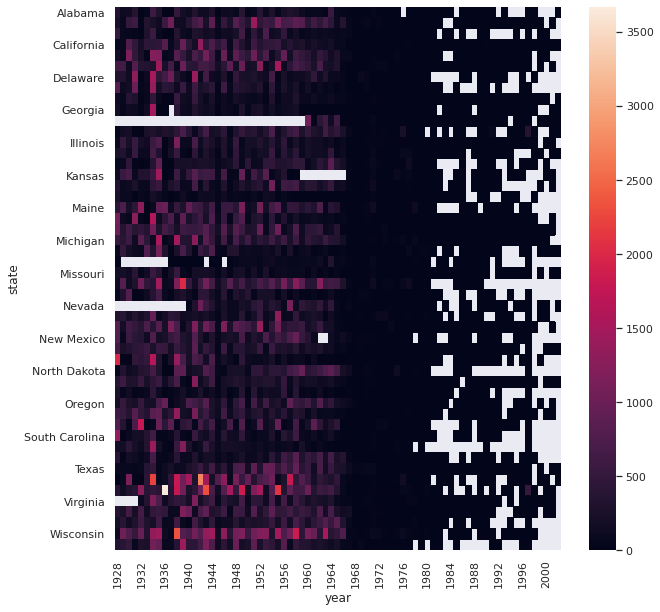

In [20]:
#In alternative to the boxplot, a heat map is more useful to show the trend of the Measles rate for every state per year
cases = df_measles.pivot("state", "year", "100,000_rate")
ax = sns.heatmap(cases)
fig = plt.gcf()
fig.set_size_inches(10, 10)

plt.show()

In [21]:
map_hepatitis=(df['disease']=='Hepatitis A')
df_hepatitis=df[map_hepatitis]
df_hepatitis['100,000_rate']=(df_hepatitis['count']*100_000)/(df_hepatitis['population'])
df_hepatitis.head()
#We need to recalculate the rate because its not for all the 52 weeks of the year
df_hepatitis['100,000_rate']=(df_hepatitis['100,000_rate'])/(df_hepatitis['weeks_reporting']/52)*100
df_hepatitis.head()

,Unnamed: 0,disease,state,year,weeks_reporting,count,population,"100,000_rate"
0,1,Hepatitis A,Alabama,1966,50,321,3345787.0,997.792149
1,2,Hepatitis A,Alabama,1967,49,291,3364130.0,917.967874
2,3,Hepatitis A,Alabama,1968,52,314,3386068.0,927.329280
3,4,Hepatitis A,Alabama,1969,49,380,3412450.0,1181.747150
4,5,Hepatitis A,Alabama,1970,51,413,3444165.0,1222.641886


[]

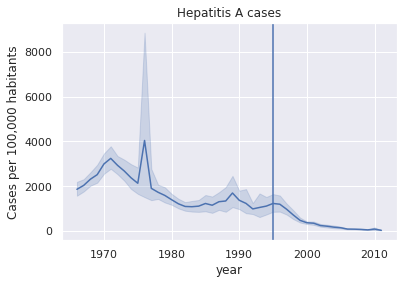

In [22]:
ax=sns.lineplot('year',
                 df_hepatitis['100,000_rate'],
                 data=df_hepatitis)
ax.axvline(x=1995)
ax.set_ylabel('Cases per 100,000 habitants')
ax.set_title('Hepatitis A cases')
plt.plot()

In [23]:
#As the task ask us, we have to prove hypotheses on effectiveness of vaccines using the proper test
#In this case we used the Mann-Whitney U Test

#First we separated the data between the years before and after the introduction of the vaccine
before_1995=(df_hepatitis['year']<1995)
df_hepatitis_before_vaccine=df_hepatitis[before_1995]


after_1995=(df_hepatitis['year']>1995)
df_hepatitis_after_vaccine=df_hepatitis[after_1995]

In [24]:
#Summarize (Statistical parameters)
print('Hepatitis before vaccine: mean=%.3f stdv=%.3f' %
      (mean(df_hepatitis_before_vaccine['100,000_rate']), std(df_hepatitis_before_vaccine['100,000_rate'])))
print('Hepatitis after vaccine: mean=%.3f stdv=%.3f' %
      (mean(df_hepatitis_after_vaccine['100,000_rate']), std(df_hepatitis_after_vaccine['100,000_rate'])))

#We use the Mann-Whitney U Test to compare samples
stat,p = mannwhitneyu(df_hepatitis_before_vaccine['100,000_rate'], df_hepatitis_after_vaccine['100,000_rate'])
print('Statistics = %.3f, p = %.210f' % (stat, p))

#Then we interpret the hypothesis with the p-value
alpha = 0.05
if p > alpha:
	print('Sample distributions are equal (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Hepatitis before vaccine: mean=1823.265 stdv=3583.450
Hepatitis after vaccine: mean=334.402 stdv=601.563
Statistics = 135432.000, p = 0.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000140
Different distribution (reject H0)


Here we can aprecciate that the test result indicates that we should reject the null hypothesis, this means that the distributions are different and we can conclude that this is due the efectiveness of the vaccine.

In [25]:
#for another disease in this specific case Polio

#First we do the mapping with only the Polio data and then the rate calculation
map_polio=(df['disease']=='Polio')
df_polio=df[map_polio]
df_polio['100,000_rate']=(df_polio['count']*100_000)/(df_polio['population'])
#We need to recalculate the rate because its not for all the 52 weeks of the year
df_polio['100,000_rate']=(df_polio['100,000_rate'])/(df_polio['weeks_reporting']/52)*100
df_polio

,Unnamed: 0,disease,state,year,weeks_reporting,count,population,"100,000_rate"
10812,10813,Polio,Alabama,1928,52,62,2589923.0,239.389356
10813,10814,Polio,Alabama,1929,52,58,2619131.0,221.447495
10814,10815,Polio,Alabama,1930,51,67,2646248.0,258.153149
10815,10816,Polio,Alabama,1931,52,54,2670818.0,202.185248
10816,10817,Polio,Alabama,1932,52,35,2693027.0,129.965277
...,...,...,...,...,...,...,...,...
12898,12899,Polio,Wyoming,1964,30,2,324243.0,106.915698
12899,12900,Polio,Wyoming,1965,0,0,322538.0,NaN
12900,12901,Polio,Wyoming,1966,0,0,321526.0,NaN
12901,12902,Polio,Wyoming,1967,0,0,321596.0,NaN


[]

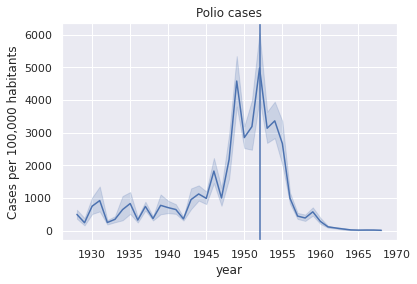

In [26]:
ax=sns.lineplot('year',
                 '100,000_rate',
                 data=df_polio)
ax.axvline(x=1952)
ax.set_ylabel('Cases per 100,000 habitants')
ax.set_title('Polio cases')
plt.plot()

In [27]:
#We do the same process as before

#First we separated the data between the years before and after the introduction of the vaccine
before_1952=(df_polio['year']<1952)
df_polio_before_vaccine=df_polio[before_1952]

after_1952=(df_polio['year']>1952)
df_polio_after_vaccine=df_polio[after_1952]

In [28]:
#Summarize (Statistical parameters)
print('Polio before vaccine: mean=%.3f stdv=%.3f' %
      (mean(df_polio_before_vaccine['100,000_rate']), std(df_polio_before_vaccine['100,000_rate'])))
print('Polio after vaccine: mean=%.3f stdv=%.3f' %
      (mean(df_polio_after_vaccine['100,000_rate']), std(df_polio_after_vaccine['100,000_rate'])))

#We use the Mann-Whitney U Test to compare samples
stat,p = mannwhitneyu(df_polio_before_vaccine['100,000_rate'], df_polio_after_vaccine['100,000_rate'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

#Then we interpret the hypothesis with the p-value
alpha = 0.05
if p > alpha:
	print('Sample distributions are equal (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Polio before vaccine: mean=1135.363 stdv=1614.723
Polio after vaccine: mean=943.231 stdv=1579.811
Statistics=497251.000, p=0.435
Sample distributions are equal (fail to reject H0)


In this particular case, we fail to reject the null hypothesis, which means that we should consider this two distributions equal. But something important to consider is that our data is only until 1970, this means that we don't have enough data to actually test if it was effective.

In [29]:
#for another disease in this specific case Rubella

#First we do the mapping with only the Mumps data and then the rate calculation
rub=(df['disease']=='Rubella')
df_rub=df[rub]
df_rub['rate_100k']=(df_rub['count']*100_000)/(df_rub['population'])
df_rub

,Unnamed: 0,disease,state,year,weeks_reporting,count,population,rate_100k
12903,12904,Rubella,Alabama,1966,31,112,3345787.0,3.347493
12904,12905,Rubella,Alabama,1967,27,214,3364130.0,6.361229
12905,12906,Rubella,Alabama,1968,33,404,3386068.0,11.931243
12906,12907,Rubella,Alabama,1969,36,136,3412450.0,3.985406
12907,12908,Rubella,Alabama,1970,51,380,3444165.0,11.033153
...,...,...,...,...,...,...,...,...
14785,14786,Rubella,Wyoming,1998,0,0,479897.0,0.000000
14786,14787,Rubella,Wyoming,1999,0,0,486758.0,0.000000
14787,14788,Rubella,Wyoming,2000,0,0,493782.0,0.000000
14788,14789,Rubella,Wyoming,2001,0,0,500794.0,0.000000


[]

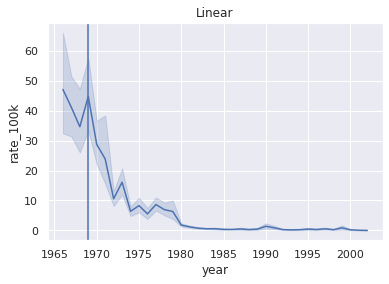

In [30]:
#We need to recalculate the rate because its not for all the 52 weeks of the year
df_rub['rate_100k']=(df_rub['rate_100k'])/(df_rub['weeks_reporting']/.52)*100
df_rub
#Then we show the plot for the year and the rate
plt=sns.lineplot(x='year', y='rate_100k',data=df_rub)

#The Rubella vaccine was introduced in nineteen sixty-nine
plt.axvline(x=1969)
plt.set_title('Linear')
plt.plot()
#You will see how the Rubella rate starts to decrease



In [31]:
#We do the same process as before

#First we separated the data between the years before and after the introduction of the vaccine
rubv=(df_rub['year']<1969)
df_rubv=df_rub[rubv]
df_rubv

rubav=(df_rub['year']>1969)
df_rubav=df_rub[rubav]


In [32]:
#Summarize (Statistical parameters)
print('Rubella before vaccine: mean=%.3f stdv=%.3f' % (mean(df_rubv['rate_100k']), std(df_rubv['rate_100k'])))
print('Rubella after vaccine: mean=%.3f stdv=%.3f' % (mean(df_rubav['rate_100k']), std(df_rubav['rate_100k'])))

#We use the Mann-Whitney U Test to compare samples
stat,p = mannwhitneyu(df_rubv['rate_100k'], df_rubav['rate_100k'])
print('Statistics=%.3f, p=%.12f' % (stat, p))

#Then we interpret the hypothesis with the p-value
alpha = 0.05
if p > alpha:
	print('Sample distributions are equal (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Rubella before vaccine: mean=40.708 stdv=42.777
Rubella after vaccine: mean=5.482 stdv=13.726
Statistics=86557.000, p=0.000000000009
Different distribution (reject H0)
